In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [5]:
tenda_pe = pd.read_csv('tenda_propostas_PE.csv',sep=';',decimal = ',')

In [6]:
tenda_pe.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [7]:
tenda_pe.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO17102414695346322,132200.0,3844.2,13566.8
1,PRO227940C2Y3X5345675,130198.5,1900.0,3481.8
2,PRO227961G7M2Z7345390,130000.0,2065.9,4555.1
3,PRO228058C3H1Y1345443,129494.1,3523.0,9538.5
4,PRO228116T5N4Y7345560,121110.6,1868.0,5881.4


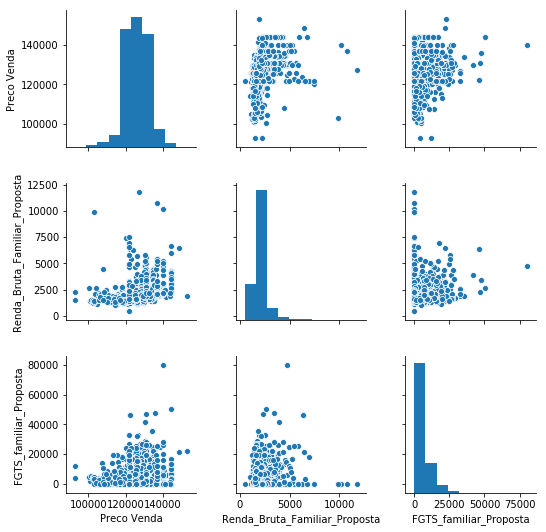

In [8]:
sb.pairplot(tenda_pe)

In [9]:
tenda_drop_pe = tenda_pe.drop(['Chave unica'],axis = 1)
tenda_drop_pe

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,132200.0,3844.2,13566.8
1,130198.5,1900.0,3481.8
2,130000.0,2065.9,4555.1
3,129494.1,3523.0,9538.5
4,121110.6,1868.0,5881.4
5,124000.0,2100.0,0.0
6,133100.0,2779.9,3464.9
7,127000.0,3802.2,12000.0
8,125000.0,2788.5,0.0
9,134583.0,2150.9,5941.0


K_MEANS (RS)

In [10]:
from sklearn.cluster import KMeans

In [11]:
sb.set_style('darkgrid')

In [12]:
wcss = []

1 167829425070.7871
2 113231281491.54239
3 76696956032.3443
4 63092000273.84036
5 51309354693.22841
6 43586887193.118
7 36951268597.97505
8 32335670115.91955
9 28521635492.740974


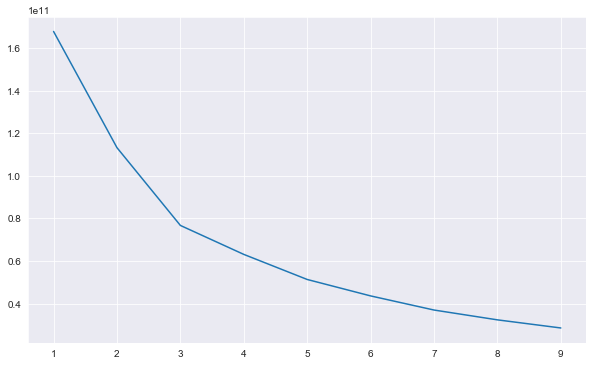

In [13]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_pe)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [14]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [15]:
kmeans.fit(tenda_drop_pe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [16]:
kmeans.labels_

array([2, 1, 1, ..., 0, 0, 0])

CLASSES CRIADAS 

In [17]:
tenda_pe['Kclasses'] = kmeans.labels_

In [18]:
tenda_pe. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO17102414695346322,132200.0,3844.2,13566.8,2
1,PRO227940C2Y3X5345675,130198.5,1900.0,3481.8,1
2,PRO227961G7M2Z7345390,130000.0,2065.9,4555.1,1
3,PRO228058C3H1Y1345443,129494.1,3523.0,9538.5,2
4,PRO228116T5N4Y7345560,121110.6,1868.0,5881.4,0
5,PRO228130T8N6J2345676,124000.0,2100.0,0.0,0
6,PRO228226G5T7J1345541,133100.0,2779.9,3464.9,1
7,PRO228235F0Z2F2346006,127000.0,3802.2,12000.0,2
8,PRO228257T2Y5L6345007,125000.0,2788.5,0.0,0
9,PRO228416D3H5F5346056,134583.0,2150.9,5941.0,1


In [19]:
tenda_pe['Kclasses'] = kmeans.labels_

In [20]:
tenda_pe.Kclasses.value_counts()

0    1022
1     801
2     363
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [21]:
tenda_pe.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,2186.00,2186.00,2186.00,2186.00
mean,126300.54,2097.91,5180.49,0.70
std,6127.80,780.05,6217.02,0.74
min,92799.60,481.30,0.00,0.00
25%,122000.00,1683.12,0.00,0.00
50%,125764.50,1956.25,3674.60,1.00
75%,130100.00,2250.00,7597.12,1.00
max,152905.10,11760.80,80000.00,2.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


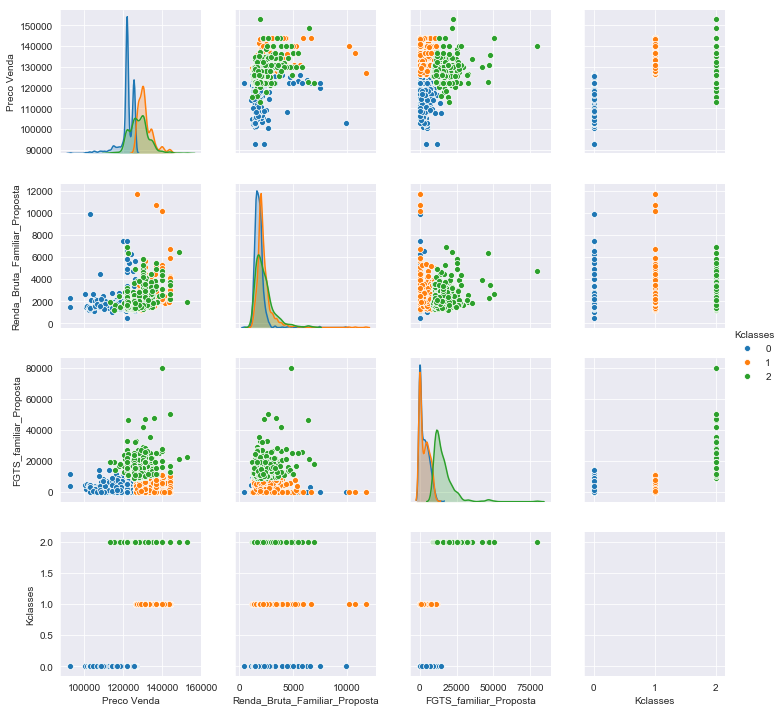

In [22]:
sb.pairplot(tenda_pe,hue='Kclasses')

EXPORTANDO DADOS

In [24]:
tenda_pe.to_csv('clustertenda_PE.csv',sep=';',decimal=',')